# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load_Data & EDA

In [2]:
houses=pd.read_csv('BostonHousing.csv')
houses

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
pd.DataFrame(houses.describe())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
houses.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
houses.duplicated().sum()

0

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
houses['chas'].unique()

array([0, 1], dtype=int64)

In [8]:
houses['rad'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [9]:
# for i in houses.select_dtypes(include=np.number).columns:
#     print(i)
#     sns.boxplot(houses[i])
#     plt.show()

In [10]:
# for i in houses.columns:
#     q1=houses[i].quantile(0.25)
#     q3=houses[i].quantile(0.75)
#     iqr=q3-q1
#     ub=q3 + 1.5*iqr
#     lb=q1 - 1.5*iqr
#     houses[i]=houses[i].apply(lambda x:houses[i].quantile(0.99) if x>ub else houses[i].quantile(0.01) if x<lb else x)

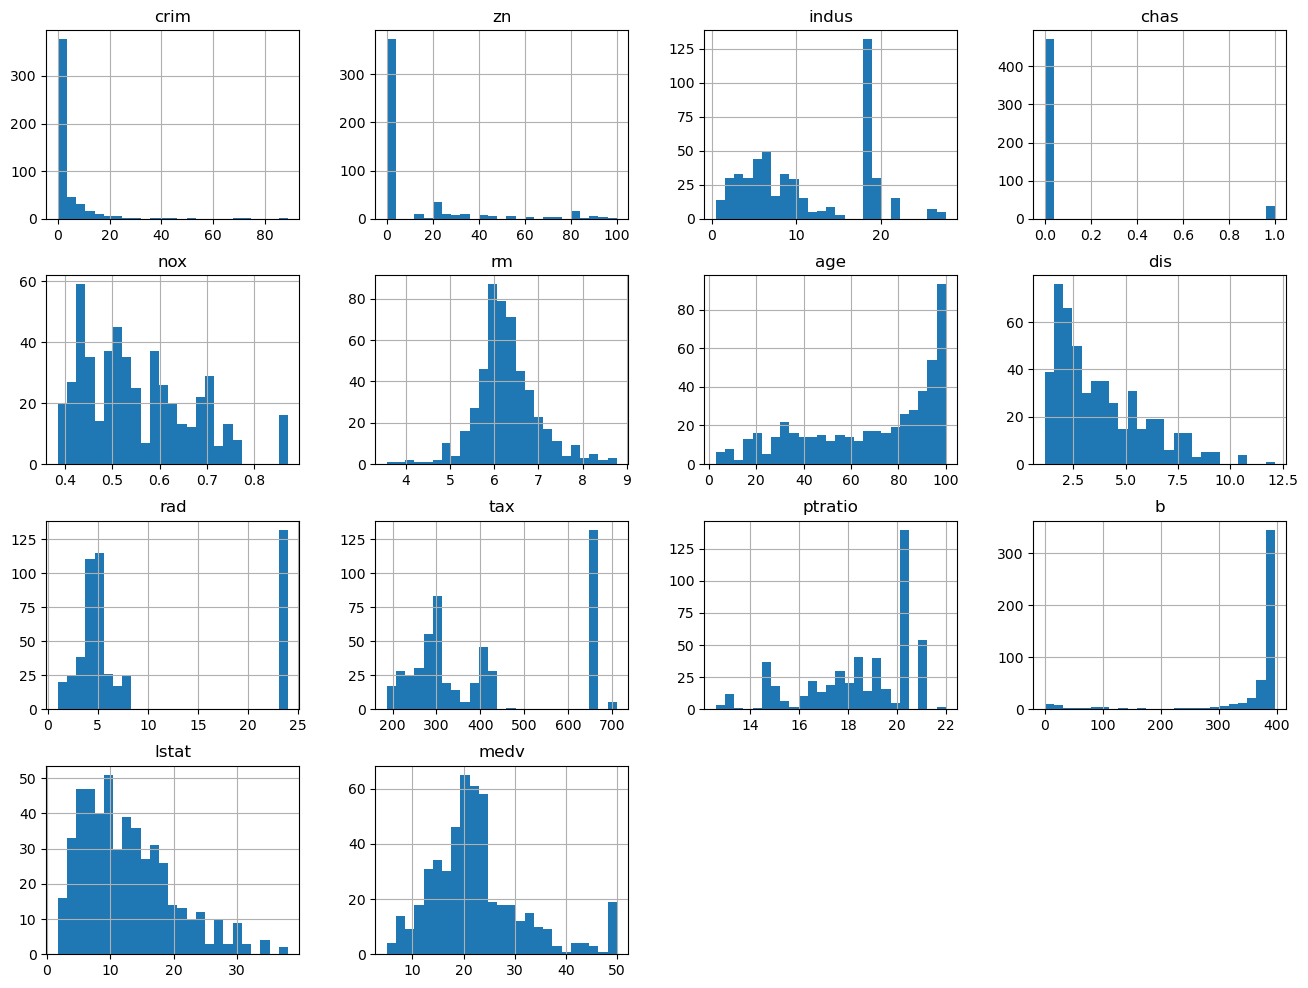

In [12]:
houses.hist(bins=25, figsize=(16, 12))
plt.show()

<AxesSubplot:xlabel='medv', ylabel='Density'>

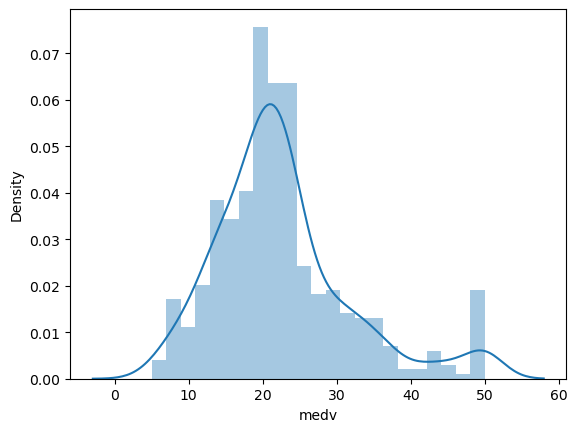

In [13]:
sns.distplot(houses['medv'])

<AxesSubplot:>

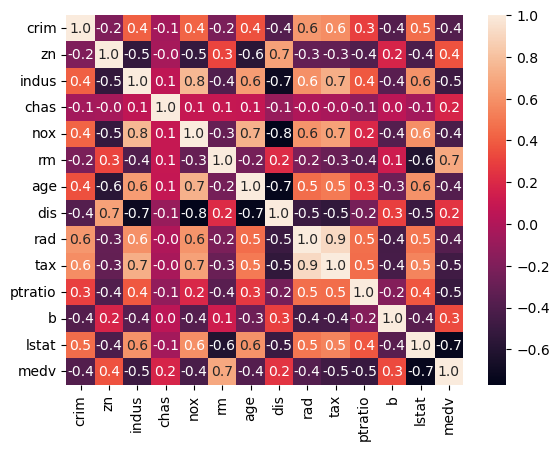

In [14]:
corr_matrix = houses.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

<AxesSubplot:xlabel='rm', ylabel='medv'>

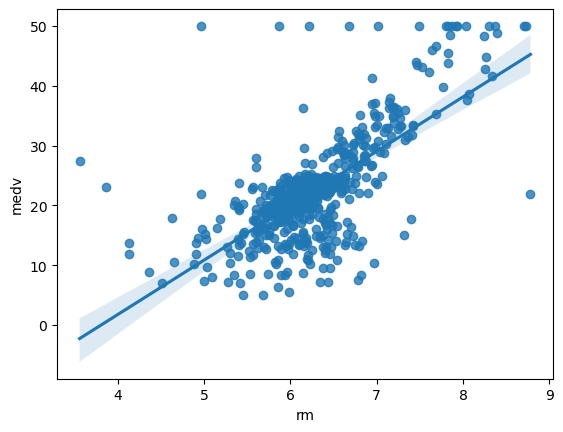

In [15]:
sns.regplot(y="medv", x="rm", data=houses, fit_reg = True)

# split data to train and test

In [16]:
X=houses.drop('medv',axis=1)
y=houses['medv']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

In [18]:
X_train_numerical = X_train.select_dtypes(include=[np.number])
X_test_numerical = X_test.select_dtypes(include=[np.number])

# Scaling

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

# Train

In [20]:
LR_model=LinearRegression()
LR_model.fit(X_train_scaled,y_train)

LinearRegression()

In [21]:
LR_model.coef_

array([-0.81940339,  0.67350444, -0.12484373,  0.80335219, -1.73377075,
        2.51527698,  0.51916009, -2.68854051,  2.76400656, -1.83415154,
       -2.2645516 ,  1.16399156, -4.24767808])

# Evaluation

In [22]:
y_predict = LR_model.predict(X_test_scaled)

In [23]:
print("MSE:",mean_squared_error(y_test,y_predict))
print("MAE:",mean_absolute_error(y_test,y_predict))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_predict)))
print("R_squared:",r2_score(y_test,y_predict))

MSE: 23.03881286628352
MAE: 3.3929547821817927
RMSE: 4.799876338644936
R_squared: 0.7330247212691933


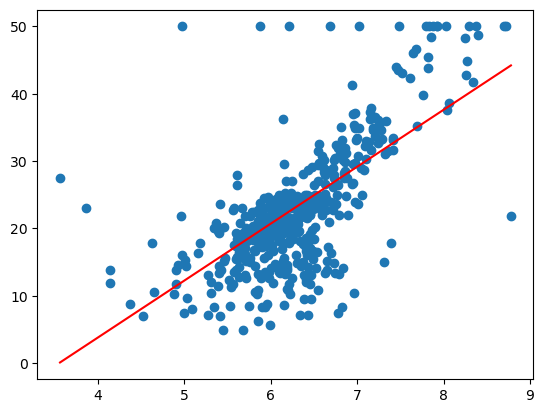

In [24]:
plt.scatter(houses['rm'],houses['medv'])
plt.plot([min(houses['rm']), max(houses['rm'])], [min(y_predict), max(y_predict)], color='red') # predicted
plt.show()